In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df_2d = pd.read_csv('data_2d.csv')
mnist_df = pd.read_csv('mnist.csv')

In [ ]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_2d)
    inertia.append(kmeans.inertia_)

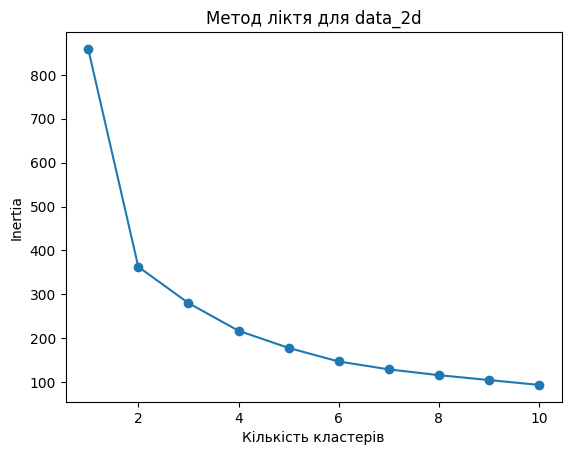

In [4]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод ліктя для data_2d')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

In [5]:
optimal_clusters_2d = 3

In [6]:
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, n_init=10, random_state=42)
df_2d['Cluster'] = kmeans_2d.fit_predict(df_2d)

In [ ]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(mnist_df)
    inertia.append(kmeans.inertia_)

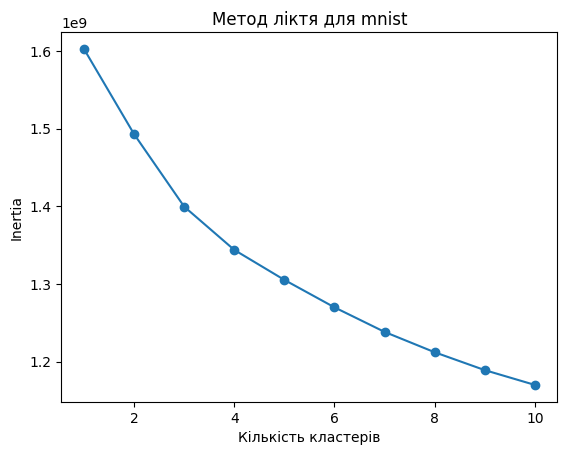

In [8]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод ліктя для mnist')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

In [9]:
optimal_clusters_mnist = 5

In [10]:
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init=10, random_state=42)
mnist_df['Cluster'] = kmeans_mnist.fit_predict(mnist_df)

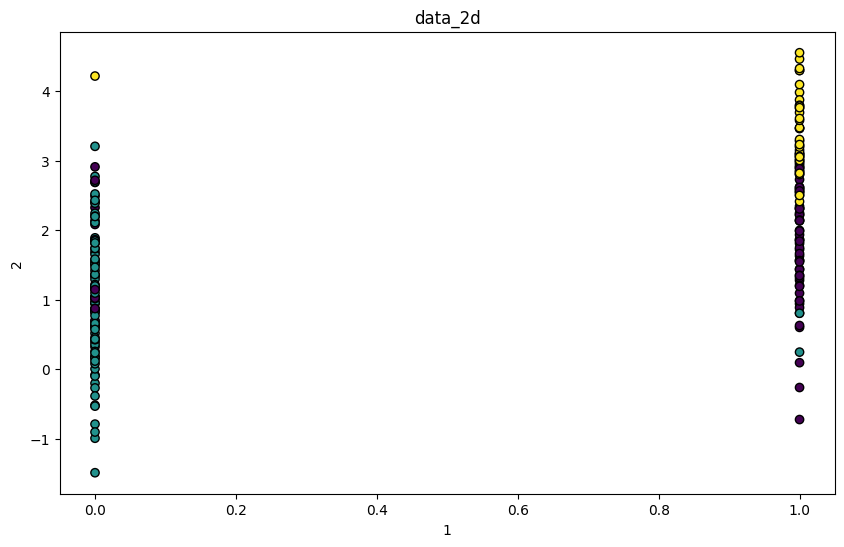

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2d.iloc[:, 0], df_2d.iloc[:, 1], c=df_2d['Cluster'], cmap='viridis', edgecolor='k')
plt.title('data_2d')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

In [12]:
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_df.drop('Cluster', axis=1))
mnist_df['PCA1'] = mnist_pca[:, 0]
mnist_df['PCA2'] = mnist_pca[:, 1]

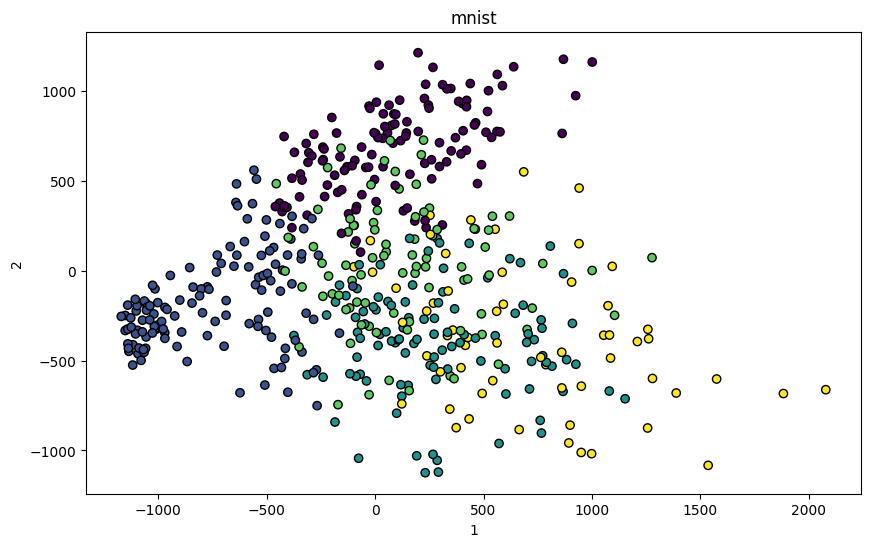

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(mnist_df['PCA1'], mnist_df['PCA2'], c=mnist_df['Cluster'], cmap='viridis', edgecolor='k')
plt.title('mnist')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

In [14]:
print("Centroids:")
print(kmeans_mnist.cluster_centers_)

Centroids:
[[6.61983471 0.         0.         ... 0.         0.         0.        ]
 [2.78125    0.         0.         ... 0.         0.         0.        ]
 [4.16504854 0.         0.         ... 0.         0.         0.        ]
 [5.08045977 0.         0.         ... 0.         0.         0.        ]
 [2.56666667 0.         0.         ... 0.         0.         0.        ]]
